# Exploratory data analysis – some insights.
With the preprocessed data, we visualized some statistical results, in order to find further hints on feature engineering.

In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

Some options for Pandas and Seaborn:

In [409]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

Import the preprocessed dataset as a Pandas dataframe

In [410]:
na_values = ['?']
df = pd.read_csv("diabetes_data_processed.csv", na_values=na_values)
df = df.drop("Unnamed: 0", axis=1)
df_dropna = df.dropna()

In [411]:
df.shape

(31114, 21)

In [412]:
df['c_diag1'].value_counts()

Circulatory        7551
Diabetes           6502
Others             4933
Respiratory        4008
Digestive          2508
Musculoskeletal    2121
Injury             1429
Genitourinary      1196
Neoplasms           862
Name: c_diag1, dtype: int64

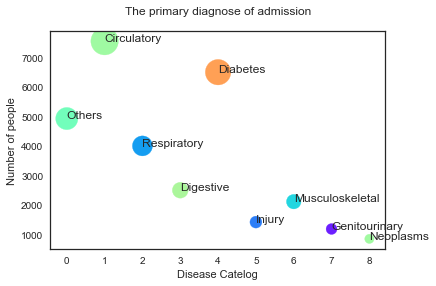

In [413]:
N=9
diseases=['Circulatory','Respiratory','Digestive','Diabetes','Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms', 'Others']
cat = [1,2,3,4,5,6,7,8,0]
num_peo = [7551, 4008, 2508, 6502, 1429, 2121, 1196, 862, 4933]
size = [755.1, 400.8, 250.8, 650.2, 142.9, 212.1, 119.6, 86.2, 493.3]

# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(cat,num_peo,s=size, color=colors)
for i in range(N):
    plt.annotate(diseases[i],xy=(cat[i],num_peo[i]))
plt.xlabel('Disease Catelog')
plt.ylabel('Number of people')

# Move title up with the "y" option
plt.title('The primary diagnose of admission',y=1.05)
plt.show()

In [414]:
df['c_diag1'].value_counts() + df['c_diag2'].value_counts() + df['c_diag3'].value_counts()

Circulatory        20309
Diabetes           31644
Digestive           4142
Genitourinary       3485
Injury              1934
Musculoskeletal     3189
Neoplasms           1314
Others             19316
Respiratory         6675
dtype: int64

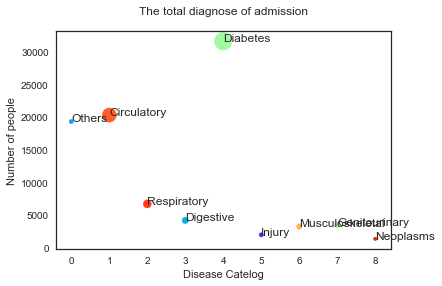

In [415]:
N=9
diseases=['Circulatory','Respiratory','Digestive','Diabetes','Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms', 'Others']
cat = [1,2,3,4,5,6,7,8,0]
num_peo = [20309, 6675, 4142, 31644, 1934, 3189, 3485, 1314, 19316]
size = [203.09, 66.75, 41.42, 316.44, 19.34, 31.89, 34.85, 13.14, 19.316]

# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(cat,num_peo,s=size, color=colors)
for i in range(N):
    plt.annotate(diseases[i],xy=(cat[i],num_peo[i]))
plt.xlabel('Disease Catelog')
plt.ylabel('Number of people')

# Move title up with the "y" option
plt.title('The total diagnose of admission',y=1.05)
plt.show()

In [416]:
df['c_diag1'] = df['c_diag1'].replace('Circulatory',1)
df['c_diag1'] = df['c_diag1'].replace('Respiratory',2)
df['c_diag1'] = df['c_diag1'].replace('Digestive',3)
df['c_diag1'] = df['c_diag1'].replace('Diabetes',4)
df['c_diag1'] = df['c_diag1'].replace('Injury',5)
df['c_diag1'] = df['c_diag1'].replace('Musculoskeletal',6)
df['c_diag1'] = df['c_diag1'].replace('Genitourinary',7)
df['c_diag1'] = df['c_diag1'].replace('Neoplasms',8)
df['c_diag1'] = df['c_diag1'].replace('Others',0)
mean = df.groupby('c_diag1')['readmitted'].mean()
mean

c_diag1
0.0    0.093858
1.0    0.102371
2.0    0.070858
3.0    0.078150
4.0    0.099200
5.0    0.125262
6.0    0.082037
7.0    0.081104
8.0    0.080046
Name: readmitted, dtype: float64

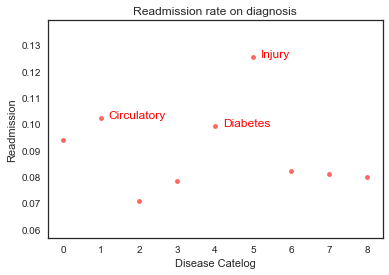

In [417]:
diag1_df = pd.DataFrame([[0.0, 0.093858], [1.0, 0.102384], [2.0, 0.070876],[3.0, 0.078181], [4.0, 0.099062], [5.0, 0.125262], [6.0, 0.082037], [7.0, 0.081104],[8.0,0.080046]],columns=['c_diag1', 'readmitted'])
diag1_df.plot.scatter(x='c_diag1', y='readmitted',color="red",alpha=0.6)
plt.title('Readmission rate on diagnosis')
plt.xlabel('Disease Catelog')
plt.ylabel('Readmission')
plt.annotate('Injury', xy=(5.2,0.125262),xytext=(5.2,0.125262),color="red")
plt.annotate('Diabetes', xy=(4.2,0.099062),xytext=(4.2,0.099062),color="red")
plt.annotate('Circulatory', xy=(1.2,0.102384),xytext=(1.2,0.102384),color="red")
plt.show()

**First finding**:  Although all of these encounters are diabetic visit, circulatory diseases like heart diseases are very likely to happen at the same time. As the primary diagnosis is the main reason for encounter, we can consider only use 'c_diag1' in our model.

**Second finding**: Injury and Circulatory diseases have higher correlation to readmission rate than other factors.

In [418]:
df['c_diag2'] = df['c_diag2'].replace('Circulatory',1)
df['c_diag2'] = df['c_diag2'].replace('Respiratory',2)
df['c_diag2'] = df['c_diag2'].replace('Digestive',3)
df['c_diag2'] = df['c_diag2'].replace('Diabetes',4)
df['c_diag2'] = df['c_diag2'].replace('Injury',5)
df['c_diag2'] = df['c_diag2'].replace('Musculoskeletal',6)
df['c_diag2'] = df['c_diag2'].replace('Genitourinary',7)
df['c_diag2'] = df['c_diag2'].replace('Neoplasms',8)
df['c_diag2'] = df['c_diag2'].replace('Others',0)

In [419]:
df['c_diag3'] = df['c_diag3'].replace('Circulatory',1)
df['c_diag3'] = df['c_diag3'].replace('Respiratory',2)
df['c_diag3'] = df['c_diag3'].replace('Digestive',3)
df['c_diag3'] = df['c_diag3'].replace('Diabetes',4)
df['c_diag3'] = df['c_diag3'].replace('Injury',5)
df['c_diag3'] = df['c_diag3'].replace('Musculoskeletal',6)
df['c_diag3'] = df['c_diag3'].replace('Genitourinary',7)
df['c_diag3'] = df['c_diag3'].replace('Neoplasms',8)
df['c_diag3'] = df['c_diag3'].replace('Others',0)

In [420]:
mean = df.groupby('time_in_hospital')['readmitted'].mean()
mean

time_in_hospital
1     0.069099
2     0.075596
3     0.082621
4     0.098765
5     0.105848
6     0.120891
7     0.127825
8     0.140610
9     0.140549
10    0.135246
11    0.120000
12    0.140575
13    0.103306
14    0.118812
Name: readmitted, dtype: float64

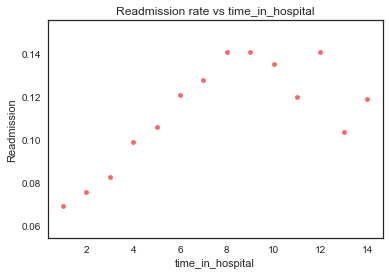

In [421]:
tih_df = pd.DataFrame([[1,0.069099], [2, 0.075447], [3, 0.082649],[4, 0.098765], [5, 0.105887], [6, 0.120891], [7, 0.127825],[8, 0.140610], [9,0.140549], [10,0.135246],[11,0.120000],[12,0.140575],[13, 0.103306],[14,0.118812]],columns=['time_in_hospital', 'readmitted'])
tih_df.plot.scatter(x='time_in_hospital', y='readmitted',color="red",alpha=0.6)
plt.title('Readmission rate vs time_in_hospital')
plt.xlabel('time_in_hospital')
plt.ylabel('Readmission')
#plt.annotate('Injury', xy=(5.2,0.125262),xytext=(5.2,0.125262),color="red")
#plt.annotate('Diabetes', xy=(4.2,0.099062),xytext=(4.2,0.099062),color="red")
#plt.annotate('Circulatory', xy=(1.2,0.102384),xytext=(1.2,0.102384),color="red")
plt.show()

**Third finding**: There is a trend that the readmmission rate will increase when the time_in_hospital and reach the maximum around 8-10 days. This feature might have strong correlation with our predictive target.

In [422]:
mean = df.groupby('age')['readmitted'].mean()
mean

age
5     0.013333
15    0.051587
25    0.079153
35    0.075543
45    0.082103
55    0.077072
65    0.095648
75    0.110409
85    0.112369
95    0.099426
Name: readmitted, dtype: float64

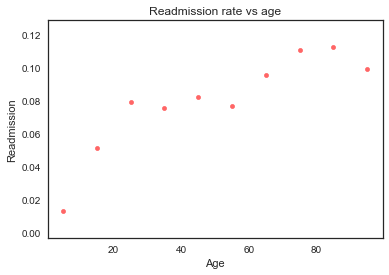

In [423]:
age_df = pd.DataFrame([[5,0.013333], [15, 0.051587], [25,0.079153],[35,0.075543], [45,0.082103], [55,0.077072], [65,0.095528],[75,0.110426], [85,0.112400], [95,0.099426]],columns=['time_in_hospital', 'readmitted'])
age_df.plot.scatter(x='time_in_hospital', y='readmitted',color="red",alpha=0.6)
plt.title('Readmission rate vs age')
plt.xlabel('Age')
plt.ylabel('Readmission')
#plt.annotate('Injury', xy=(5.2,0.125262),xytext=(5.2,0.125262),color="red")
#plt.annotate('Diabetes', xy=(4.2,0.099062),xytext=(4.2,0.099062),color="red")
#plt.annotate('Circulatory', xy=(1.2,0.102384),xytext=(1.2,0.102384),color="red")
plt.show()

**Third finding**: There is a trend that the readmmission rate will increase when the time_in_hospital and reach the maximum around 8-10 days. This feature might have strong correlation with our predictive target. The age feature has a similar correlation. 

In [424]:
mean = df.groupby('admission_type_id')['readmitted'].mean()
mean

admission_type_id
1    0.093838
2    0.097517
3    0.083175
4    0.250000
5    0.086466
6    0.101518
7    0.000000
8    0.101190
Name: readmitted, dtype: float64

In [425]:
df['admission_type_id'].value_counts()

1    15644
3     6300
2     5558
6     2108
5     1330
8      168
4        4
7        2
Name: admission_type_id, dtype: int64

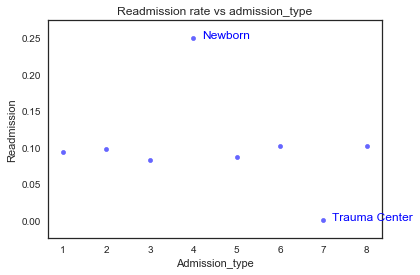

In [426]:
admis_type_df = pd.DataFrame([[1,0.093838], [2,0.097517], [3,0.083175],[4,0.250000], [5,0.086466], [6,0.101518], [7,0.000000],[8,0.101190]],columns=['admission_type', 'readmitted'])
admis_type_df.plot.scatter(x='admission_type', y='readmitted',color="blue",alpha=0.6)
plt.title('Readmission rate vs admission_type')
plt.xlabel('Admission_type')
plt.ylabel('Readmission')
plt.annotate('Newborn', xy=(4.2,0.25),xytext=(4.2,0.25),color="blue")
plt.annotate('Trauma Center', xy=(7.2,0.0),xytext=(7.2,0.0),color="blue")
#plt.annotate('Circulatory', xy=(1.2,0.102384),xytext=(1.2,0.102384),color="red")
plt.show()

In [427]:
mean = df.groupby('discharge_disposition_id')['readmitted'].mean()
mean

discharge_disposition_id
1     0.072057
2     0.147475
3     0.157307
4     0.085859
5     0.225000
6     0.098754
7     0.081448
8     0.116279
9     0.000000
10    0.000000
15    0.428571
16    0.000000
17    0.000000
18    0.116913
22    0.318949
23    0.035294
24    0.000000
25    0.063107
27    0.000000
28    0.500000
Name: readmitted, dtype: float64

In [428]:
df['discharge_disposition_id'].value_counts()

1     21136
6      3372
3      2867
18     1283
22      533
2       495
25      412
5       400
7       221
4       198
23       85
8        43
28       32
15       14
17        7
10        5
24        4
9         3
16        3
27        1
Name: discharge_disposition_id, dtype: int64

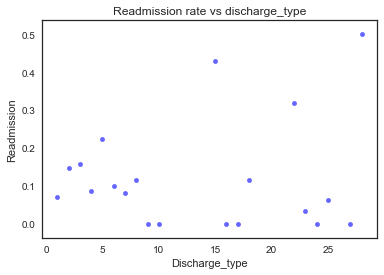

In [429]:
dis_type_df = pd.DataFrame([[1,0.072057], [2,0.147475], [3,0.157307],[4,0.085859], [5,0.225000], [6,0.098754], [7,0.081448],[8,0.116279],[9,0.000000],[10,0.000000],[15,0.428571],[16,0.000000],[17,0.000000], [18,0.116913], [22,0.318949], [23,0.035294], [24,0.000000], [25,0.063107], [27,0.000000], [28,0.500000]],columns=['discharge_type', 'readmitted'])
dis_type_df.plot.scatter(x='discharge_type', y='readmitted',color="blue",alpha=0.6)
plt.title('Readmission rate vs discharge_type')
plt.xlabel('Discharge_type')
plt.ylabel('Readmission')
#plt.annotate('Newborn', xy=(4.2,0.25),xytext=(4.2,0.25),color="blue")
#plt.annotate('Trauma Center', xy=(7.2,0.0),xytext=(7.2,0.0),color="blue")
#plt.annotate('Circulatory', xy=(1.2,0.102384),xytext=(1.2,0.102384),color="red")
plt.show()

Just like diagnoses, there were quite a few categories for admission type and discharge disposition. We collapsed these variables into fewer categories where it made sense. 
For admission type, the number for Newborn and Trauma Center are very small which make the admission rate of these two type quite abnormal, so we just simply exclude these two types and seperate the rest into:

Admission_type: 
1. Emergency: 1,2 
2. Elective: 3
3. NULL/not mapped: 5,6,8

In [430]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)
df = df[(df['admission_type_id'] != int(4)) & (df['admission_type_id'] != int(7))]
df['admission_type_id'] = df['admission_type_id'].replace(3,2)
df['admission_type_id'] = df['admission_type_id'].replace(5,3)
df['admission_type_id'].value_counts()

1    21202
2     6300
3     3606
Name: admission_type_id, dtype: int64

For discharge type, similar, we exclude 9,10,16,17,24,27 and seperate the rest into:

discharge_type:
1. Go to home or tranfer to have home care.(1,6,8,23)
2. Tranform to other health care.(2,3,4,5,8,15,22,28)
3. Left AMA(7)
4. NULL/not mapped(18,25,26)

In [431]:
df = df[(df['discharge_disposition_id'] != int(9)) & (df['discharge_disposition_id'] != int(10)) & (df['discharge_disposition_id'] != int(16)) & (df['discharge_disposition_id'] != int(17)) & (df['discharge_disposition_id'] != int(24)) & (df['discharge_disposition_id'] != int(27))]
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(28,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)

In [432]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(7,3)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(18,4)
df['discharge_disposition_id'].value_counts()

1    24588
2     4581
4     1695
3      221
Name: discharge_disposition_id, dtype: int64

In [433]:
mean = df.groupby('admission_type_id')['readmitted'].mean()
mean

admission_type_id
1    0.094834
2    0.083188
3    0.096352
Name: readmitted, dtype: float64

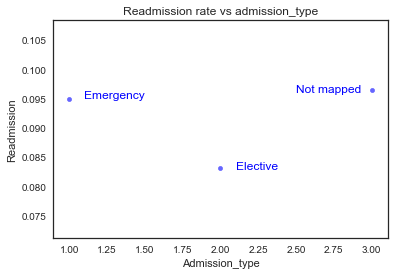

In [434]:
admis_type_df = pd.DataFrame([[1,0.094834], [2,0.083188], [3,0.096352]],columns=['admission_type', 'readmitted'])
admis_type_df.plot.scatter(x='admission_type', y='readmitted',color="blue",alpha=0.6)
plt.title('Readmission rate vs admission_type')
plt.xlabel('Admission_type')
plt.ylabel('Readmission')
plt.annotate('Emergency', xy=(1.1,0.095),xytext=(1.1,0.095),color="blue")
plt.annotate('Elective', xy=(2.1,0.083),xytext=(2.1,0.083),color="blue")
plt.annotate('Not mapped', xy=(2.5,0.096),xytext=(2.5,0.096),color="blue")
plt.show()

In [435]:
mean = df.groupby('discharge_disposition_id')['readmitted'].mean()
mean

discharge_disposition_id
1    0.075565
2    0.180747
3    0.081448
4    0.103835
Name: readmitted, dtype: float64

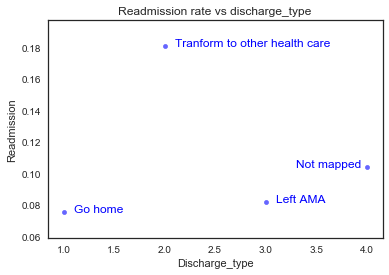

In [436]:
dis_type_df = pd.DataFrame([[1,0.075565], [2,0.180747], [3,0.081448],[4,0.103835]],columns=['discharge_type', 'readmitted'])
dis_type_df.plot.scatter(x='discharge_type', y='readmitted',color="blue",alpha=0.6)
plt.title('Readmission rate vs discharge_type')
plt.xlabel('Discharge_type')
plt.ylabel('Readmission')
plt.annotate('Go home', xy=(1.1,0.075565),xytext=(1.1,0.075565),color="blue")
plt.annotate('Tranform to other health care', xy=(2.1,0.180747),xytext=(2.1,0.180747),color="blue")
plt.annotate('Left AMA', xy=(3.1,0.081448),xytext=(3.1,0.081448),color="blue")
plt.annotate('Not mapped', xy=(3.3,0.103835),xytext=(3.3,0.103835),color="blue")
plt.show()

After removing and combining, the left types are less but more reasonable.

## Feature correlation
Now lets find out the correlation between different feature set and we will remove those data points 
that are hightly correlated.
lets calculate teh correleation between different variable and use thoe values to plot the correlation graph for better visualization.

In [437]:
correlations = df.corr()

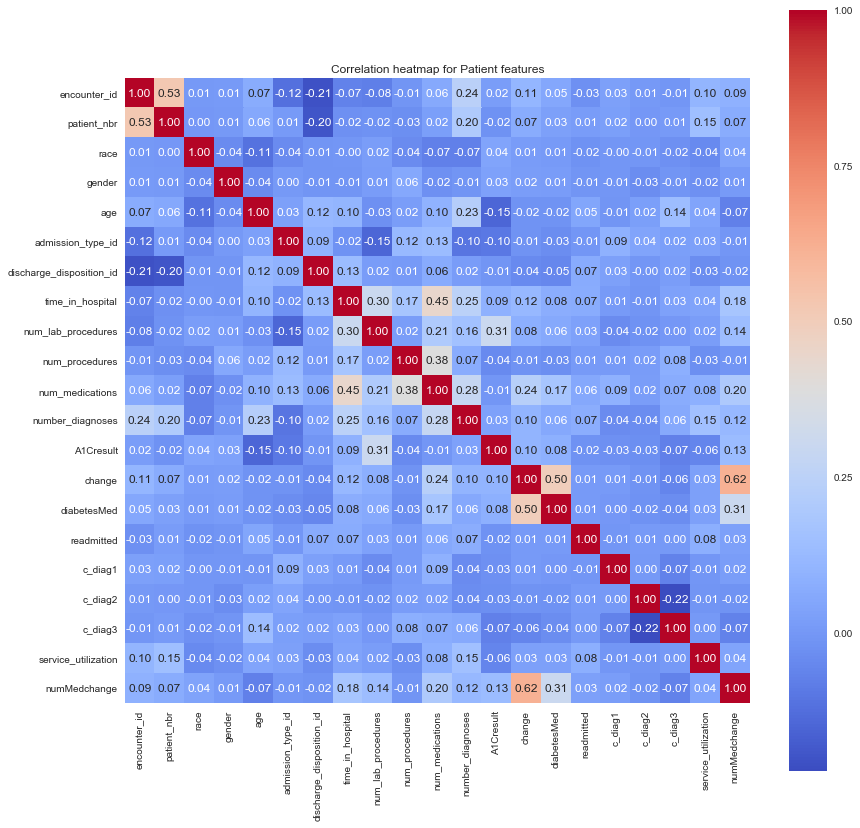

In [438]:
# plot correlation matrix

plt.figure(figsize=(14,14))
plt.title("Correlation heatmap for Patient features")
temp = sns.heatmap(correlations, cbar = True,  square = True, annot=True, 
            fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm') 
plt.show()

In the above plot, number of Medicine changed is correlated with change. However, we created this feature ourselves, so in this case our decision is save them both. 

## Feature normalization
Log transformation on those continuous numeric variables.
Let's first take a look at their range and distribution before log transformation.

In [439]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                        float64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_diagnoses              int64
A1Cresult                     int64
change                        int64
diabetesMed                   int64
readmitted                    int64
c_diag1                     float64
c_diag2                     float64
c_diag3                     float64
service_utilization           int64
numMedchange                  int64
dtype: object

In [440]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,change,diabetesMed,readmitted,c_diag1,c_diag2,c_diag3,service_utilization,numMedchange
count,3.108500e+04,3.108500e+04,30238.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.00000,31085.000000,31085.000000,31081.000000,30863.000000,29977.000000,31085.000000,31085.000000
mean,1.477385e+08,5.056108e+07,1.358919,0.465852,61.382500,1.433682,1.325173,3.834004,41.252566,1.192955,14.399678,6.311018,-77.189094,0.49310,0.798327,0.092649,2.708246,2.409131,2.590386,0.676725,0.306579
std,9.944694e+07,3.919606e+07,0.728330,0.498841,17.275791,0.690407,0.748893,2.727038,19.518328,1.604253,7.668861,2.199858,41.238659,0.49996,0.401256,0.289945,2.180899,2.095130,1.969996,1.555502,0.503121
min,1.668000e+04,1.350000e+02,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-99.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.103819e+07,1.892744e+07,1.000000,0.000000,55.000000,1.000000,1.000000,2.000000,30.000000,0.000000,9.000000,5.000000,-99.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.302139e+08,4.246528e+07,1.000000,0.000000,65.000000,1.000000,1.000000,3.000000,43.000000,1.000000,13.000000,6.000000,-99.000000,0.00000,1.000000,0.000000,2.000000,2.000000,4.000000,0.000000,0.000000
75%,1.998691e+08,8.527744e+07,2.000000,1.000000,75.000000,2.000000,1.000000,5.000000,55.000000,2.000000,18.000000,9.000000,-99.000000,1.00000,1.000000,0.000000,4.000000,4.000000,4.000000,1.000000,1.000000
max,4.438475e+08,1.894815e+08,5.000000,1.000000,95.000000,3.000000,4.000000,14.000000,118.000000,6.000000,67.000000,16.000000,1.000000,1.00000,1.000000,1.000000,8.000000,8.000000,8.000000,49.000000,4.000000


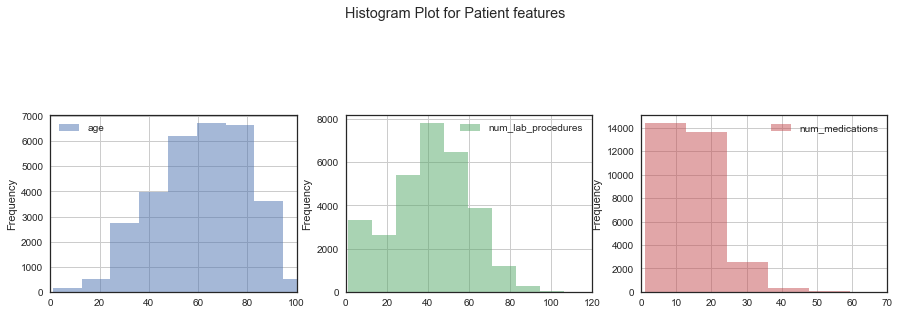

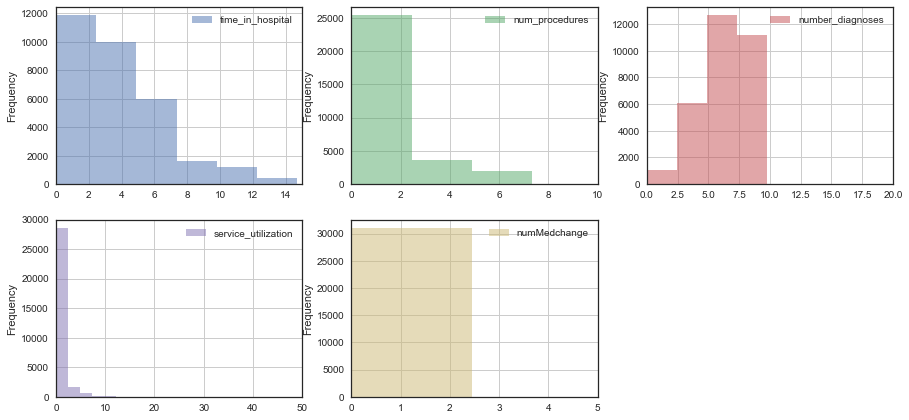

In [441]:
colmn1 = ['age','num_lab_procedures','num_medications']
colmn2 = ['time_in_hospital','num_procedures','number_diagnoses','service_utilization', 'numMedchange']
filter_data1 = df[colmn1]
filter_data2 = df[colmn2]
ax_list1 = filter_data1.plot(kind='hist', subplots=True, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True,title="Histogram Plot for Patient features")
ax_list2 = filter_data2.plot(kind='hist', bins=20,subplots=True, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True)
ax_list1[0][0].set_xlim((0,100))
ax_list1[0][1].set_xlim((0,120))
ax_list1[0][2].set_xlim((0, 70))
ax_list2[0][0].set_xlim((0, 15))
ax_list2[0][1].set_xlim((0, 10))
ax_list2[0][2].set_xlim((0, 20))
ax_list2[1][0].set_xlim((0, 50))
ax_list2[1][1].set_xlim((0, 5))
plt.show()

1. Compute log(x) for any feature x if percentage of 0s in x ≤ 2%.
2. Compute log1p(x) otherwise (log1p(x) means log(x+1), while retaining the zeros.

In [443]:
colmn3 = ['num_procedures', 'service_utilization','numMedchange']
colmn4 = ['age','num_lab_procedures','num_medications','time_in_hospital','number_diagnoses']
for col in colmn3:
    df[col + "_log1p"] = np.log1p(df[col])
for col in colmn4:
    df[col + "_log"] = np.log(df[col])

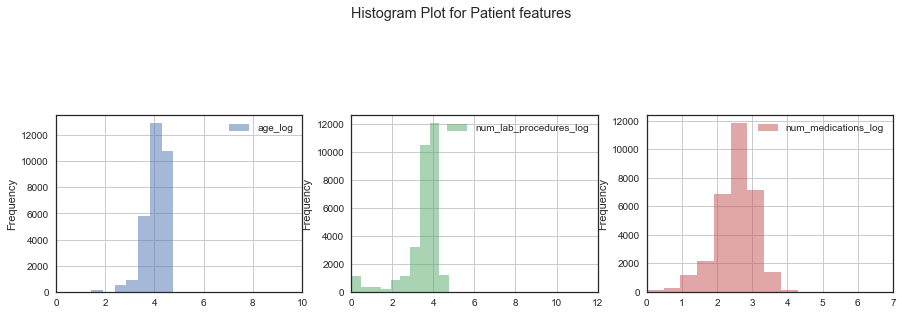

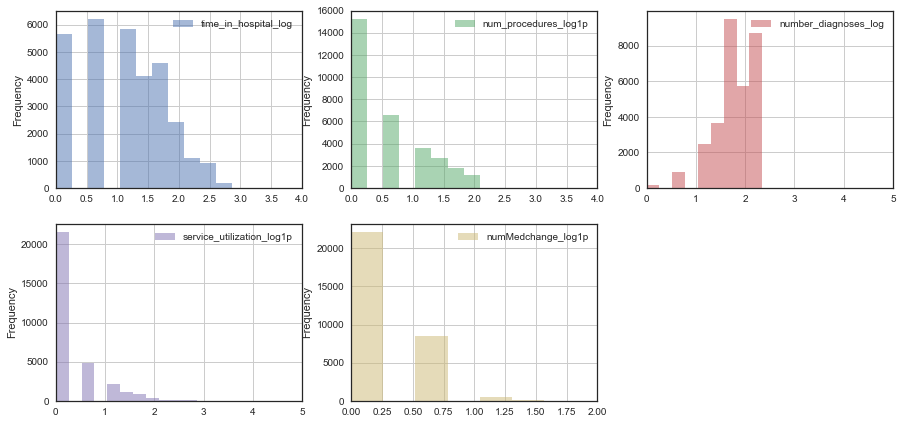

In [444]:
colmn1 = ['age_log','num_lab_procedures_log','num_medications_log']
colmn2 = ['time_in_hospital_log','num_procedures_log1p','number_diagnoses_log','service_utilization_log1p', 'numMedchange_log1p']
filter_data1 = df[colmn1]
filter_data2 = df[colmn2]
ax_list1 = filter_data1.plot(kind='hist', subplots=True, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True,title="Histogram Plot for Patient features")
ax_list2 = filter_data2.plot(kind='hist',subplots=True, bins =15, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True)
ax_list1[0][0].set_xlim((0,10))
ax_list1[0][1].set_xlim((0,12))
ax_list1[0][2].set_xlim((0, 7))
ax_list2[0][0].set_xlim((0, 4))
ax_list2[0][1].set_xlim((0, 4))
ax_list2[0][2].set_xlim((0, 5))
ax_list2[1][0].set_xlim((0, 5))
ax_list2[1][1].set_xlim((0, 2))
plt.show()

Some of the normalization are not ideal, we will train our model using both set of features to see which can get better performance.

In [445]:
df.to_csv('./diabetes_data_processed2.csv')